**Converting EdgeList for Karate Club Dataset**

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()

for line in nx.generate_edgelist(G, data=False):
    print(line)
    



0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 10
0 11
0 12
0 13
0 17
0 19
0 21
0 31
1 2
1 3
1 7
1 13
1 17
1 19
1 21
1 30
2 3
2 7
2 8
2 9
2 13
2 27
2 28
2 32
3 7
3 12
3 13
4 6
4 10
5 6
5 10
5 16
6 16
8 30
8 32
8 33
9 33
13 33
14 32
14 33
15 32
15 33
18 32
18 33
19 33
20 32
20 33
22 32
22 33
23 25
23 27
23 29
23 32
23 33
24 25
24 27
24 31
25 31
26 29
26 33
27 33
28 31
28 33
29 32
29 33
30 32
30 33
31 32
31 33
32 33


**Applying Louvain Algorithm on Karate Club**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install networkx
!pip install community

In [ ]:
import networkx as nx
from community import community_louvain

G = nx.read_edgelist('/content/drive/My Drive/Karate Club/KarateClubDataset.txt', create_using = nx.Graph(), nodetype = int)

parts = community_louvain.best_partition(G, resolution = 2, randomize = 0)
values = [parts.get(node) for node in G.nodes()]

a = []
b = []

i=0
for item in parts:
    a.append(item)
	#a[i] = item
    i = i + 1
	
i=0
for item2 in values:
    b.append(item2)
	#b[i] = item2
    i = i + 1

with open('/content/drive/My Drive/Karate Club/LouvainKarateCommunity.txt', 'a') as f:
#f= open("a.txt","w+")
	for i in range(len(a)):
		f.write(str(a[i]) + '\t ' + str(b[i]) + '\n')
  


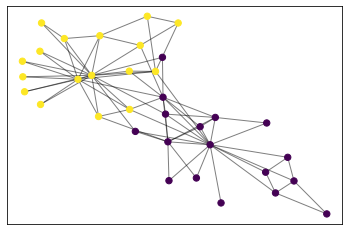

In [ ]:
import networkx as nx
from community import community_louvain

G = nx.read_edgelist('/content/drive/My Drive/Karate Club/KarateClubDataset.txt', create_using = nx.Graph(), nodetype = int)

parts = community_louvain.best_partition(G, resolution = 2, randomize = 0)
values = [parts.get(node) for node in G.nodes()]

pos = nx.spring_layout(G)

cmap = cm.get_cmap('viridis', max(parts.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

**Installing Libraries**

In [ ]:
!pip install sklearn
!pip install numpy
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install pandas

**F1 Score**

In [ ]:
from sklearn.metrics import f1_score

file1 = open("/content/drive/My Drive/Karate Club/LouvainKarateCommunity.txt", "r")
file2 = open("/content/drive/My Drive/Karate Club/KarateClubGroundTruth.txt", "r")

#y_true = [0, 1, 2, 0, 1, 2]
#y_pred = [0, 2, 1, 0, 0, 1]

array1 = []
array2 = []

for item1 in file1:
	item1 = item1.strip()
	item1 = item1.split(" ")
	community1 = item1[1].strip()
	array1.append(community1)
	
for item2 in file2:
	item2 = item2.strip()
	item2 = item2.split(" ")
	community2 = item2[1].strip()
	array2.append(community2)


x = f1_score(array1, array2, average='macro')
print ("The f1 score with macro average is :" + str(x))
x = f1_score(array1, array2, average='micro')
print ("The f1 score with micro average is :" + str(x))
x = f1_score(array1, array2, average='weighted')
print ("The f1 score with weighted average is :" + str(x))

The f1 score with macro average is :0.735064935064935
The f1 score with micro average is :0.735294117647059
The f1 score with micro average is :0.7350649350649349


**Rand Index Calculation**

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
file1 = open("/content/drive/My Drive/Karate Club/LouvainKarateCommunity.txt", "r")
file2 = open("/content/drive/My Drive/Karate Club/KarateClubGroundTruth.txt", "r")


array1 = []
array2 = []

for item1 in file1:
	item1 = item1.strip()
	item1 = item1.split(" ")
	community1 = item1[1].strip()
	array1.append(community1)
	
for item2 in file2:
	item2 = item2.strip()
	item2 = item2.split(" ")
	community2 = item2[1].strip()
	array2.append(community2)

	
x = adjusted_rand_score(array1, array2)
print ("%f \n" % x)


0.197211 



**Confusion Matrix**

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

file1 = open("/content/drive/My Drive/Karate Club/LouvainKarateCommunity.txt", "r")
file2 = open("/content/drive/My Drive/Karate Club/KarateClubGroundTruth.txt", "r")

array1 = []
array2 = []

for item1 in file1:
	item1 = item1.strip()
	item1 = item1.split(" ")
	community1 = item1[1].strip()
	array1.append(community1)
	
for item2 in file2:
	item2 = item2.strip()
	item2 = item2.split(" ")
	community2 = item2[1].strip()
	array2.append(community2)

print(metrics.confusion_matrix(array1, array2))

print(metrics.classification_report(array1, array2))


[[12  5]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       0.72      0.76      0.74        17

    accuracy                           0.74        34
   macro avg       0.74      0.74      0.74        34
weighted avg       0.74      0.74      0.74        34



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


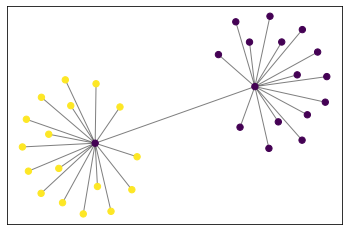

In [ ]:
import networkx as nx
from community import community_louvain

G = nx.read_edgelist('/content/drive/My Drive/Karate Club/LouvainKarateCommunity.txt', create_using = nx.Graph(), nodetype = int)

parts = community_louvain.best_partition(G, resolution = 2, randomize = 0)
values = [parts.get(node) for node in G.nodes()]

pos = nx.spring_layout(G)

cmap = cm.get_cmap('viridis', max(parts.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()